### Machine Learning: Regression
___

#### Summary:

Regression is a supervised learning problem that involves finding a mapping between an input and a continuous output. There are many different algorithms that can be used to solve the regression problem.  These include both linear and nonlinear algorithms. In this notebook we will apply some of these algorithms. We will not derive any of them but will instead use prebuilt functions from the sklearn library.
___
#### This notebook will include:
1. Linear Regression
2. Polynomial Linear Regression
3. Support Vector Regression
4. Decision Tree Regression
5. Random Forest Regression
___
#### Reference: 

Much of what is in this notebook was learned from the Regression section of the Udemy course "Machine Learning: A-Z" by Kirill Eremenko. 

X_train: (20, 1)
X_test: (4, 1)
y_train: (20,)
y_test: (4,)


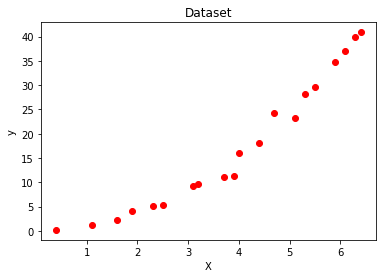

In [1]:
# Example dataset
"""
The dataset that will be used for this notebook consists of 20 training examples and 4 test examples 
where the input contains only 1 feature. Often inputs will have more features but for this example
dataset we use 1 because it is easier to visualize.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the dataset
X_train = np.array([[0.4],[1.1],[1.6],[1.9],[2.3],[2.5],[3.1],[3.2],[3.7],[3.9],[4.0],[4.4],[4.7],
                   [5.1],[5.3],[5.5],[5.9],[6.1],[6.3],[6.4]])
y_train = np.array([0.2,1.3,2.2,4.0,5.1,5.3,9.3,9.7,11.1,11.2,16.0,18.1,24.3,
                    23.2,28.1,29.6,34.7,37.0,39.9,40.9])
X_test = np.array([[0.9],[3.1],[5.0],[5.4]])
y_test = np.array([0.8,9.6,25.0,29.2])

# Printing the dataset shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Plotting the dataset
plt.plot(X_train, y_train, 'ro')

plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Prediction on test set: [ -3.9498566   11.98337051  25.74388483  28.64083522]


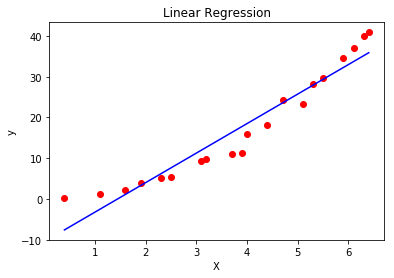

In [2]:
# Linear Regression
"""
The Linear Regression model is a simple model that takes in a weighted sum of the input features plus a 
bias to predict the output. The predicted output and the actual output are then used to measure a loss
function, which is the mean-squared error for linear regression. By subtracting the gradient of the loss 
function with respect to the parameters (weights and bias) from the parameters, we get the updated 
parameters. Every time we update the parameters they get closer to their optimal value.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the Linear Regression model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Linear Regression curve
plt.plot(X_train, y_train, 'ro')
X_grid = np.linspace(min(X_train), max(X_train), 1000).reshape(-1,1)
plt.plot(X_grid, regressor.predict(X_grid), 'b-')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Prediction on test set: [  0.91963263   8.71690223  24.03185492  28.40840457]


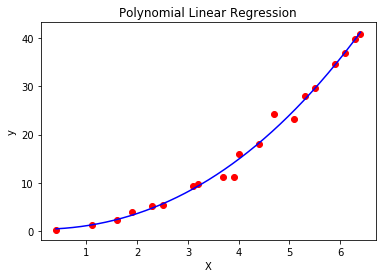

In [3]:
# Polynomial Linear Regression
"""
The Polynomial Linear Regression model works the same way as the Linear Regression model but with one
difference, the inputs are polynomial mappings of the original inputs. 
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining polynomial features (degree = 3)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating and fitting the Polynomial Linear Regression model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test_poly)
print('Prediction on test set:', y_pred)

# Plotting the Polynomial Linear Regression curve
plt.plot(X_train, y_train, 'ro')
X_grid = np.linspace(min(X_train), max(X_train), 1000).reshape(-1,1)
X_grid_poly = poly_features.transform(X_grid)
plt.plot(X_grid, regressor.predict(X_grid_poly), 'b-')

plt.title('Polynomial Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Prediction on test set: [  1.8118478    9.04062451  24.91538902  29.75767819]


C:\Users\Marvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Marvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Marvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

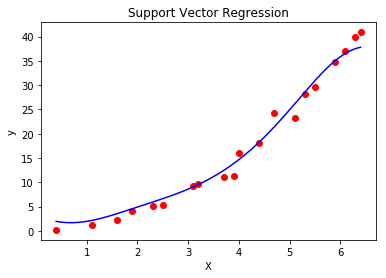

In [4]:
# Support Vector Regression
"""
The Support Vector Regression model is a nonlinear way to approach the regression problem. It is more
complicated than the models shown earlier but essentially what it does is it takes all training examples
into consideration when estimating the output for a new example; training examples that are closer to 
the new example have greater impact than training examples further away. The amount by which the impact
differs can be altered by changing the hyperparameter 'C'.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing: Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Creating and fitting the SVR model to the training set
from sklearn.svm import SVR
regressor = SVR(C = 1, kernel = 'rbf')
regressor.fit(X_train_scaled, y_train_scaled)

# Predicting the test set result
y_pred = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred)
print('Prediction on test set:', y_pred)

# Plotting the SVR curve
plt.plot(X_train, y_train, 'ro')
X_grid = np.linspace(min(X_train), max(X_train), 1000).reshape(-1,1)
X_grid_scaled = scaler_X.transform(X_grid)
y_grid_scaled = regressor.predict(X_grid_scaled)
y_grid = scaler_y.inverse_transform(y_grid_scaled)
plt.plot(X_grid, y_grid, 'b-')

plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Prediction on test set: [  1.3   9.3  23.2  28.1]


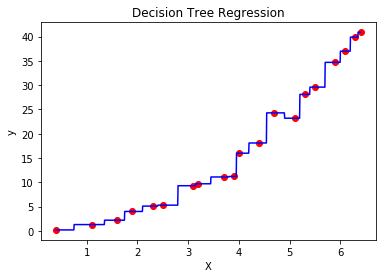

In [5]:
# Decision Tree Regression
"""
The Decision Tree Regression model separates the training set into sections that best split the data.
Any new example must fall into one of these sections and its estimated output is calculated to be the
average of the outputs of the training examples within that section.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the Decision Tree Regression model to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Decision Tree Regression curve
plt.plot(X_train, y_train, 'ro')
X_grid = np.linspace(min(X_train), max(X_train), 1000).reshape(-1,1)
plt.plot(X_grid, regressor.predict(X_grid), 'b-')

plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Prediction on test set: [  1.46   9.14  24.02  28.06]


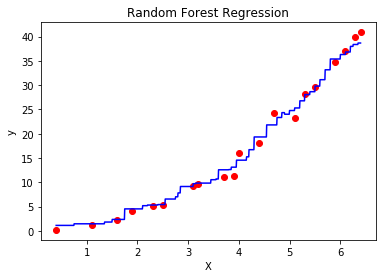

In [6]:
# Random Forest Regression
"""
The Random Forest Regression Model takes a random subset from the training set and applies the Decision
Tree Regression model to it. It does this multiple times with different random subsets from the training
set. For any new example, there will be an output prediction for each one of these Decision Trees. The
estimated output for the Random Forest Regression model is the average of these Decision Tree outputs.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the Random Forest Regression model to the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10) # Number of decision trees
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Random Forest Regression curve
plt.plot(X_train, y_train, 'ro')
X_grid = np.linspace(min(X_train), max(X_train), 1000).reshape(-1,1)
plt.plot(X_grid, regressor.predict(X_grid), 'b-')

plt.title('Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()